In [2]:
# import display libs
from IPython.display import Image
%matplotlib inline
from IPython.display import Latex

In [17]:
# import libs
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt


# setup figure params
figureparams = {'axes.labelsize': 24,
           'axes.titlesize': 20,
           'axes.linewidth': 1.3,
           'font.size': 20,
           'legend.fontsize': 18,
           'figure.figsize': (10,7),
           'font.family': 'serif',
           'font.serif': 'Computer Modern Roman',
           'xtick.labelsize': 18,
           'xtick.major.size': 5.5,
           'xtick.major.width': 1.3,
           'ytick.labelsize': 18,
           'ytick.major.size': 5.5,
           'ytick.major.width': 1.3,
           'text.usetex': True,
           'figure.autolayout': True}
plt.rcParams.update(figureparams)
matplotlib.rcParams['text.usetex']=False
matplotlib.rcParams['text.latex.unicode']=True
matplotlib.get_configdir()

C:\Users\EdwardJansenADC\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 3.0 and will be removed in 3.2.


'C:\\Users\\EdwardJansenADC\\.matplotlib'

# Stability of the migration matrix
### Contents
    1. Construction ...
    2. blalba

## 1. Stability of migration matrix

In [221]:
# Compute mig matrix steps:
#   1. Compute the number of clients N_i in each state
#   2. Compute N_ij, the number of clients that move from state i at snapshot t to state j at snapshot t+1
#   3.Compute p_ij as N_ij / N_i

# TODO: create realistic migration matrix

# Generate migration matrix
# generate N_ij
n_states = 6
N_ij = np.diag(np.ones(n_states))*100 +np.round(np.random.rand(n_states, n_states)*10, 0)

# generate N_i from N_ij
N_i = np.sum(N_ij, axis=1)

# compute p_ij 
p_ij = np.round(N_ij / N_i[:,None] , 3)     # round for clarity, shld not be done in proper implementation
np.sum(p_ij, axis=1)                        # check normalization; in real life there is termination, so sum is not equal to 1

array([1.   , 0.999, 1.   , 1.001, 1.001, 1.001])

In [222]:
# compute paired z-stat
# lower diagonal
d_ij_low = np.roll(p_ij, -1, axis=1) - p_ij
SD_low = np.sqrt( N_i[:,None]**(-1)*( p_ij*(1-p_ij)  + np.roll(p_ij, -1, axis=1) * (1-np.roll(p_ij, -1, axis=1)) + 2*p_ij*np.roll(p_ij, -1, axis=1)) )
z_ij_low = np.round(np.divide(d_ij_low,  SD_low), 2)
x_up, y_up = np.triu_indices(6, 0)
z_ij_low[x_up, y_up] = 0

# upper diagonal
d_ij_up = np.roll(p_ij, +1, axis=1) - p_ij
SD_up = np.sqrt( N_i[:,None]**(-1)*( p_ij*(1-p_ij)  + np.roll(p_ij, 1, axis=1) * (1-np.roll(p_ij, 1, axis=1)) + 2*p_ij*np.roll(p_ij, 1, axis=1)) )
z_ij_up = np.round(np.divide(d_ij_up,  SD_up), 2)
x_low, y_low = np.tril_indices(6, 0)
z_ij_up[x_low, y_low] = 0

# combine
z_ij = z_ij_low + z_ij_up

In [223]:
# compute p-values
def z_test(z_stat):
    from scipy.stats import norm    
    # calculate the p-value
    p = norm.cdf(z_stat)               # one sided test
    return p

p_val = np.round(z_test(z_ij), 2)
print(p_val)

[[0.5  1.   0.85 0.28 0.07 0.73]
 [1.   0.5  1.   0.84 0.16 0.01]
 [0.79 1.   0.5  1.   0.88 0.5 ]
 [0.23 0.16 1.   0.5  1.   0.5 ]
 [0.79 0.63 0.13 1.   0.5  1.  ]
 [0.33 0.99 0.41 0.04 1.   0.5 ]]


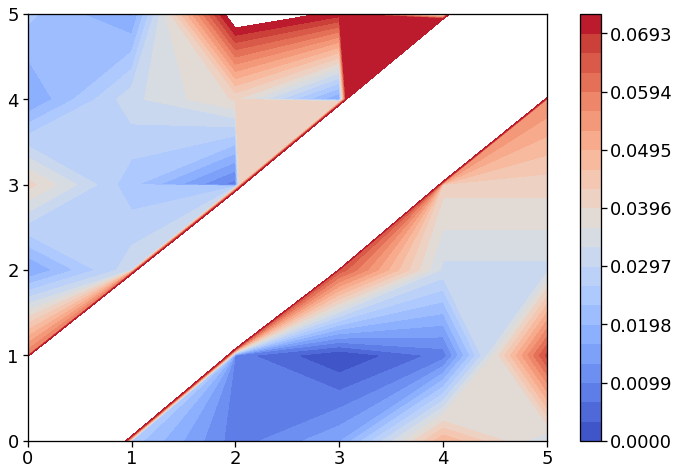

In [224]:
# plot heatmap
levels = np.arange(0, 0.075, 0.0033)   # leave out diagonal to get better resolution
cmap = plt.cm.get_cmap("coolwarm")
x = y = np.arange(0, n_states, 1)
X, Y = np.meshgrid(x, y)

plt.contourf(X, Y, p_ij, levels, cmap=cmap)
plt.colorbar()
plt.show()